In [1]:
import os
import numpy as np
import pandas as pd

file_path = './test_results.xlsx'

df_raw = pd.read_excel(file_path, engine='openpyxl')
df_raw = df_raw.loc[:, ~df_raw.columns.str.contains("Unnamed:")]



In [2]:
pivot_index = list(df_raw.columns[0:17]) # accuracy 전까지
pivot_index.remove('drift_model')
pivot_index.remove('n_rep')
pivot_index.remove('pruning')
pivot_index.remove('Gmax')
pivot_index.remove('Gmin')
pivot_index

['model',
 'dataset',
 'device',
 'IOparameter',
 'GDC',
 'mapping_scaling_omega',
 'noise_model',
 'pgm_noise_scale',
 'read_noise_scale',
 'drift_scale',
 'G_ratio',
 'inf_time']

In [ ]:
df = df_raw.copy()

In [41]:
df = df[df['G_ratio']==25]
# df = df[df['drift_model'] == 'log']
# df = df[df['inf_time'] == 1]
df = df[df['pgm_noise_scale'] == 1]

In [42]:
df_mlp = df[df['model'] == 'MLP']
df_res = df[df['model'] == 'Resnet18']

In [25]:
df_res

,model,dataset,pruning,device,IOparameter,GDC,mapping_scaling_omega,noise_model,pgm_noise_scale,read_noise_scale,drift_scale,drift_model,Gmax,Gmin,G_ratio,n_rep,inf_time,accuracy,std
2,Resnet18,CIFAR10,-,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,0,0,1,default,default,default,25,10,1,92.808998,0.063849
3,Resnet18,CIFAR10,-,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,0,0,1,default,default,default,25,10,10,92.717995,0.068928
4,Resnet18,CIFAR10,-,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,0,0,1,default,default,default,25,10,100,90.811996,0.101521
5,Resnet18,CIFAR10,-,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,0,0,1,default,default,default,25,10,1000,77.809998,0.042163
6,Resnet18,CIFAR10,-,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,0,0,1,default,default,default,25,10,3600,60.394001,0.141122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,Resnet18,CIFAR10,0.7,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,0,0,1,log,default,default,25,10,100000000,9.825000,0.123940
1984,Resnet18,CIFAR10,0.7,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,0,0,1,log,default,default,25,10,1000000000,10.047000,0.042700
1985,Resnet18,CIFAR10,0.7,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,0,0,1,log,default,default,25,10,10000000000,10.000000,0.000000
1986,Resnet18,CIFAR10,0.7,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,0,0,1,log,default,default,25,10,1000000000000,10.000000,0.000000


In [7]:
df_mlp['pruning'].unique()
df_res['pruning'].unique()

array(['-', 0.3, 0.4, 0.5, 0.6, 0.7], dtype=object)

In [43]:
df_mlp_log = df_mlp[df_mlp['drift_model'] == 'log']
df_mlp_001 = df_mlp[df_mlp['drift_model'] == 0.01]

df_res_log = df_res[df_res['drift_model'] == 'log']
df_res_001 = df_res[df_res['drift_model'] == 0.01]

In [27]:
df_pivot_log = df_mlp_log.pivot_table(index=pivot_index, columns='pruning', values='accuracy', aggfunc='mean')
df_pivot_log.reset_index(inplace=True) # index to columns

In [34]:
df_pivot_log

pruning,model,dataset,device,IOparameter,GDC,mapping_scaling_omega,noise_model,pgm_noise_scale,read_noise_scale,drift_scale,G_ratio,inf_time,0.3,0.4,0.5,0.6,0.7,-
0,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,1,95.889000,94.520996,93.931999,93.182999,93.977997,94.646000
1,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,10,95.714005,93.679001,93.399994,93.314011,93.480003,94.607002
2,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,100,95.091003,93.894005,92.822990,92.666000,93.028992,93.891998
3,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,1000,93.894005,92.297997,91.600006,90.589005,91.462997,92.503998
4,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,3600,93.251999,90.673996,90.348000,88.800003,91.166992,91.702495
5,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,10000,92.467003,89.640999,89.798996,88.224998,90.202003,90.334003
6,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,86400,90.586998,87.344994,87.167007,84.850998,87.205002,87.478001
7,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,10000000,84.922005,79.480003,80.693001,76.643997,81.030998,80.229500
8,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,100000000,80.792000,74.638992,76.678001,72.145004,76.630997,75.491490
9,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,1000000000,76.849007,69.914993,70.481003,66.940002,72.294998,69.859005


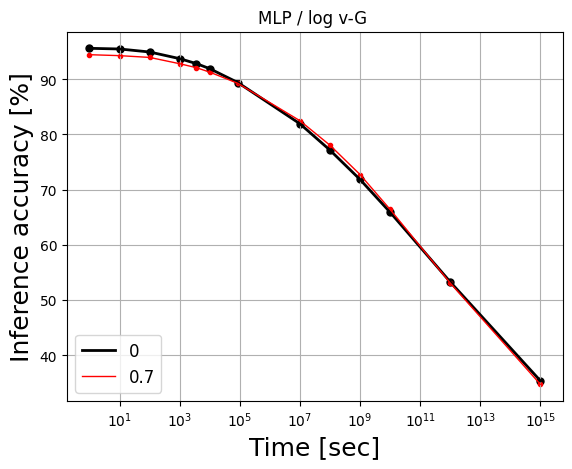

In [29]:
import matplotlib.pyplot as plt

x = df_pivot_log['inf_time']

plt.grid(True)

plt.plot(x,df_pivot_log['-'], label = '0', linewidth=2, color='k')
plt.scatter(x, df_pivot_log['-'], marker='.', s=100, color='k')

# plt.plot(x,df_pivot_log[0.3], label = '0.3', linewidth=1, color='dodgerblue')
# plt.scatter(x, df_pivot_log[0.3], marker='.',  color='dodgerblue')

# plt.plot(x,df_pivot_log[0.4], label = '0.4', linewidth=1, color='darkorange')
# plt.scatter(x, df_pivot_log[0.4], marker='.',  color='darkorange')

# plt.plot(x,df_pivot_log[0.5], label = '0.5', linewidth=1, color='g')
# plt.scatter(x, df_pivot_log[0.5], marker='.',  color='g')

# plt.plot(x,df_pivot_log[0.6], label = '0.6', linewidth=1, color='m')
# plt.scatter(x, df_pivot_log[0.6], marker='.',  color='m')

plt.plot(x,df_pivot_log[0.7], label = '0.7', linewidth=1, color='r')
plt.scatter(x, df_pivot_log[0.7], marker='.', color='r')

plt.title("MLP / log v-G ")
plt.legend(fontsize=12, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

# plt.ylim(60,100)
# plt.xlim(1,100000000)
plt.xscale('log')
plt.show()

In [30]:
df_pivot_001 = df_mlp_001.pivot_table(index=pivot_index, columns='pruning', values='accuracy', aggfunc='mean')
df_pivot_001.reset_index(inplace=True) # index to columns

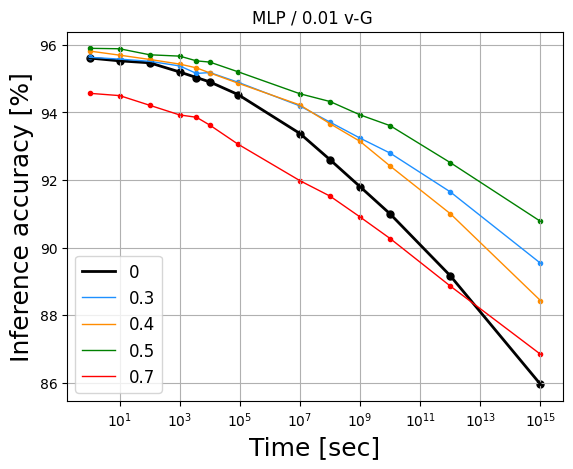

In [33]:
x = df_pivot_001['inf_time']

plt.grid(True)

plt.plot(x,df_pivot_001['-'], label = '0', linewidth=2, color='k')
plt.scatter(x, df_pivot_001['-'], marker='.', s=100, color='k')

plt.plot(x,df_pivot_001[0.3], label = '0.3', linewidth=1, color='dodgerblue')
plt.scatter(x, df_pivot_001[0.3], marker='.',  color='dodgerblue')

plt.plot(x,df_pivot_001[0.4], label = '0.4', linewidth=1, color='darkorange')
plt.scatter(x, df_pivot_001[0.4], marker='.',  color='darkorange')

plt.plot(x,df_pivot_001[0.5], label = '0.5', linewidth=1, color='g')
plt.scatter(x, df_pivot_001[0.5], marker='.',  color='g')

# plt.plot(x,df_pivot_001[0.6], label = '0.6', linewidth=1, color='m')
# plt.scatter(x, df_pivot_001[0.6], marker='.',  color='m')

plt.plot(x,df_pivot_001[0.7], label = '0.7', linewidth=1, color='r')
plt.scatter(x, df_pivot_001[0.7], marker='.', color='r')

plt.title("MLP / 0.01 v-G ")
plt.legend(fontsize=12, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

# plt.ylim(80,100)
# plt.xlim(1,100000000)
plt.xscale('log')
plt.show()

In [76]:
df_pivot_001

pruning,model,dataset,device,IOparameter,GDC,mapping_scaling_omega,noise_model,pgm_noise_scale,read_noise_scale,drift_scale,G_ratio,inf_time,0.3,0.4,0.5,0.6,0.7,-
0,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,1,95.850998,94.554001,93.953995,93.257004,94.141991,94.441002
1,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,10,95.723991,93.786003,93.629997,93.241005,93.524994,94.749008
2,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,100,95.514008,94.550003,93.440994,93.097000,93.491005,94.548996
3,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,1000,95.216003,94.134995,93.074997,91.967003,92.593994,94.076004
4,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,3600,95.227997,93.632996,92.812996,90.885002,93.126999,94.616989
5,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,10000,94.926003,93.284012,93.065002,91.227005,92.948997,93.959000
6,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,86400,94.729004,93.229004,92.471992,89.887001,91.841003,93.296005
7,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,10000000,93.934998,91.577995,91.691002,87.784996,90.878006,92.988007
8,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,100000000,93.181999,90.972992,91.300003,86.792999,90.084000,92.684998
9,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,1000000000,92.933998,90.070000,89.921005,85.938004,89.942001,91.685997


In [44]:
df_r_pivot_log = df_res_log.pivot_table(index=pivot_index, columns='pruning', values='accuracy', aggfunc='mean')
df_r_pivot_log.reset_index(inplace=True) # index to columns

In [45]:
df_r_pivot_log

pruning,model,dataset,device,IOparameter,GDC,mapping_scaling_omega,noise_model,pgm_noise_scale,read_noise_scale,drift_scale,G_ratio,inf_time,0.3,0.4,0.5,0.6,0.7,-
0,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,1,91.219002,90.636002,89.258995,81.991989,47.004002,91.490005
1,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,10,91.020996,90.448997,88.267006,80.365005,45.195995,91.287998
2,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,100,87.740005,86.628998,83.689987,71.768005,38.204002,88.962998
3,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,1000,73.485001,71.280991,67.737000,49.512001,29.620998,76.670502
4,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,3600,58.490002,56.094002,52.959003,36.387001,24.965000,63.062500
5,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,10000,44.850002,42.273998,39.868000,28.739002,21.753000,49.701999
6,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,86400,23.820999,23.401001,22.761999,20.288000,17.712000,26.359500
7,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,10000000,14.497999,14.765001,13.977000,12.721000,13.781000,14.863000
8,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,100000000,10.773001,10.769000,12.427000,11.379999,10.127000,12.581500
9,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,1000000000,10.000000,10.000000,10.031000,10.005000,9.874001,12.459000


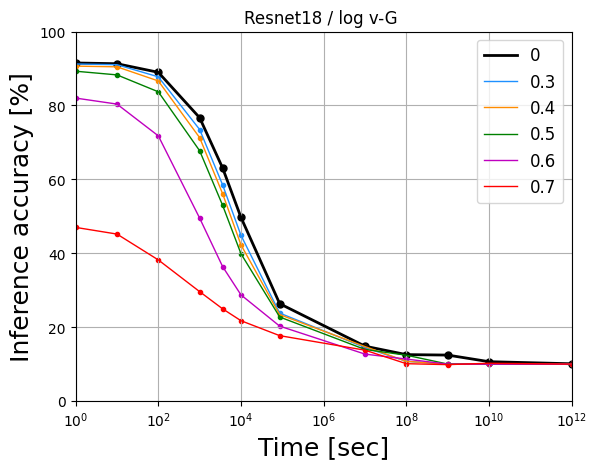

In [46]:
import matplotlib.pyplot as plt

x = df_r_pivot_log['inf_time']

plt.grid(True)

plt.plot(x,df_r_pivot_log['-'], label = '0', linewidth=2, color='k')
plt.scatter(x, df_r_pivot_log['-'], marker='.', s=100, color='k')

plt.plot(x,df_r_pivot_log[0.3], label = '0.3', linewidth=1, color='dodgerblue')
plt.scatter(x, df_r_pivot_log[0.3], marker='.',  color='dodgerblue')

plt.plot(x,df_r_pivot_log[0.4], label = '0.4', linewidth=1, color='darkorange')
plt.scatter(x, df_r_pivot_log[0.4], marker='.',  color='darkorange')

plt.plot(x,df_r_pivot_log[0.5], label = '0.5', linewidth=1, color='g')
plt.scatter(x, df_r_pivot_log[0.5], marker='.',  color='g')

plt.plot(x,df_r_pivot_log[0.6], label = '0.6', linewidth=1, color='m')
plt.scatter(x, df_r_pivot_log[0.6], marker='.',  color='m')

plt.plot(x,df_r_pivot_log[0.7], label = '0.7', linewidth=1, color='r')
plt.scatter(x, df_r_pivot_log[0.7], marker='.', color='r')

plt.title("Resnet18 / log v-G ")
plt.legend(fontsize=12, loc='upper right', bbox_to_anchor=(1.0, 1.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(0,100)
plt.xlim(1,1000000000000)
plt.xscale('log')
plt.show()

In [47]:
df_r_pivot_001 = df_res_001.pivot_table(index=pivot_index, columns='pruning', values='accuracy', aggfunc='mean')
df_r_pivot_001.reset_index(inplace=True) # index to columns

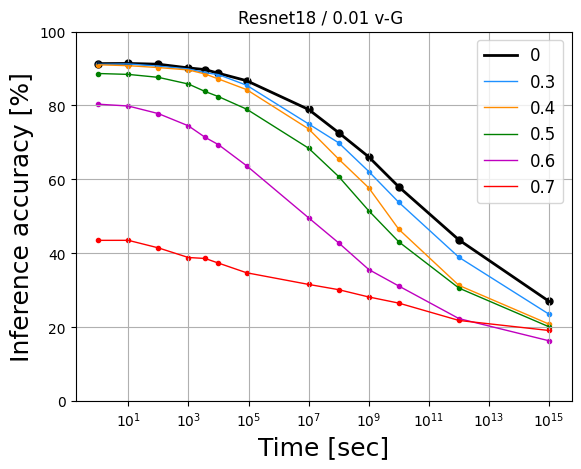

In [48]:
x = df_r_pivot_001['inf_time']

plt.grid(True)

plt.plot(x,df_r_pivot_001['-'], label = '0', linewidth=2, color='k')
plt.scatter(x, df_r_pivot_001['-'], marker='.', s=100, color='k')

plt.plot(x,df_r_pivot_001[0.3], label = '0.3', linewidth=1, color='dodgerblue')
plt.scatter(x, df_r_pivot_001[0.3], marker='.',  color='dodgerblue')

plt.plot(x,df_r_pivot_001[0.4], label = '0.4', linewidth=1, color='darkorange')
plt.scatter(x, df_r_pivot_001[0.4], marker='.',  color='darkorange')

plt.plot(x,df_r_pivot_001[0.5], label = '0.5', linewidth=1, color='g')
plt.scatter(x, df_r_pivot_001[0.5], marker='.',  color='g')

plt.plot(x,df_r_pivot_001[0.6], label = '0.6', linewidth=1, color='m')
plt.scatter(x, df_r_pivot_001[0.6], marker='.',  color='m')

plt.plot(x,df_r_pivot_001[0.7], label = '0.7', linewidth=1, color='r')
plt.scatter(x, df_r_pivot_001[0.7], marker='.', color='r')

plt.title("Resnet18 / 0.01 v-G ")
plt.legend(fontsize=12, loc='upper right', bbox_to_anchor=(1.0, 1.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(0,100)
# plt.xlim(1,100000000)
plt.xscale('log')